In [2]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [3]:
 def pretty_print_response(response):
    print(json.dumps(response, indent=4, sort_keys=True))

In [4]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET_KEY= os.getenv('PLAID_SBX_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

In [4]:
type('PLAID_PUBLIC_KEY')

str

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [5]:
INSTITUTION_ID = "ins_109508"

In [9]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

### 2. Generate a public token

In [10]:
create_token_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

ConnectionError: HTTPSConnectionPool(host='dev.plaid.com', port=443): Max retries exceeded with url: /sandbox/public_token/create (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x00000172C61B7188>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

### 3. Exchange the public token for an access token

In [11]:
# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Store access token as variable
access_token = exchange_response['access_token']

NameError: name 'create_tkn_response' is not defined

### 4. Fetch Accounts

In [21]:
client.Accounts.get(access_token)

NameError: name 'access_token' is not defined

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [22]:
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

transaction_response = client.Transactions.get(access_token,start_date,end_date)
transactions = transaction_response['transactions']
pretty_print_response(transactions)

NameError: name 'access_token' is not defined

### 2. Print the categories for each transaction

In [14]:
for transaction in transactions:
    print(transaction["category"])

NameError: name 'transactions' is not defined

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [15]:
transactions_df = pd.DataFrame(columns=['Date', 'Name', 'Amount', 'Category'])
dates, names, amounts, cats = [],[],[],[]
for transaction in transactions:
    dates.append(transaction['date'])
    names.append(transaction['name'])
    amounts.append(float(transaction['amount']))
    cats.append(transaction['category'][0])
transactions_df['Date'] = dates
transactions_df['Name'] = names
transactions_df['Amount'] = amounts
transactions_df['Category'] = cats
transactions_df.dropna
transactions_df.tail()
    

NameError: name 'transactions' is not defined

### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [16]:
transactions_df.set_index(pd.DatetimeIndex(transactions_df['Date']), inplace=True)
transactions_df.head()
transactions_df.drop(columns=['Date'], inplace = True)
transactions_df.head()

,Name,Amount,Category
Date,,,


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [23]:
income_response = client.Income.get(access_token)
print(income_response['income'])

NameError: name 'access_token' is not defined

In [18]:
income_response = client.Income.get(access_token)
#income_response
print(income_response['income'])

last_year_gross_income = income_response['income']['last_year_income_before_tax']
print(f"last years gross income was: ${last_year_gross_income}")

# wondering why and where did income streams have to be placed here.why should i have known that
# is it because then code was ran and income streams was a visible part of incomne created monthly
monthly_income = income_response['income']['income_streams'][0]['monthly_income']
print(f"monthly income is: ${monthly_income}")

projected_yearly_income = income_response['income']['projected_yearly_income']
print(f"projected_yearly_income is: ${projected_yearly_income}")

NameError: name 'access_token' is not defined

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [19]:
expenses_by_cat = transactions_df.groupby('Category').sum()

,Name,Amount
Category,,


IndexError: list index out of range

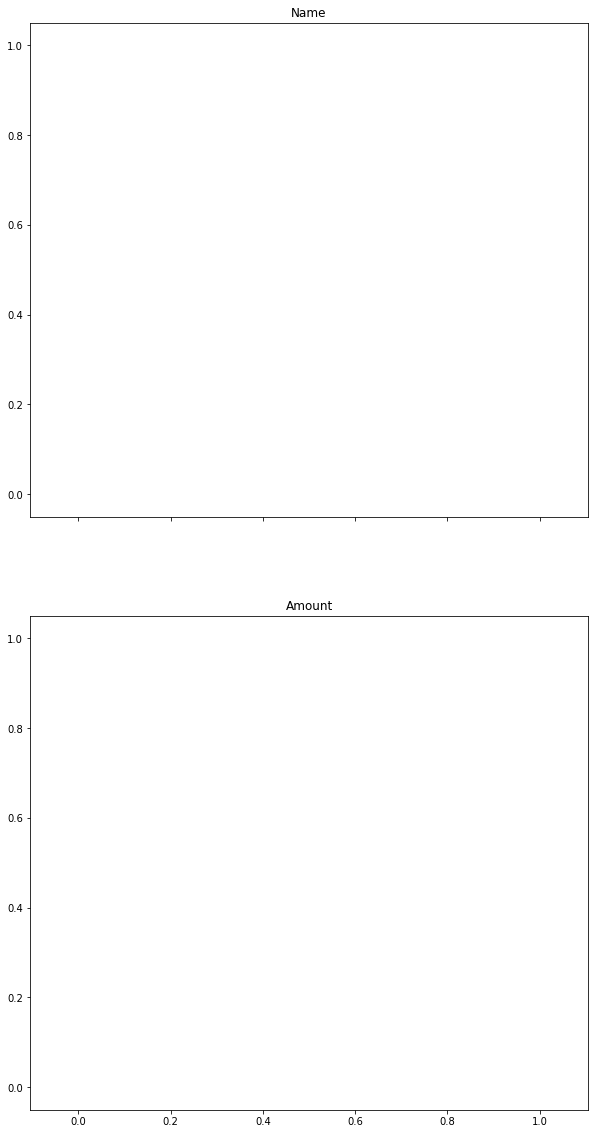

In [20]:
#Create Bar Chart
expenses_by_cat.plot(kind = 'bar', subplots = True, title = "expenses_by_category", figsize = (10,20))

In [ ]:
# calculate income per month
transactions_per_month = transactions_df.groupby(transactions_df.index.month).sum()

In [ ]:
#calculate transactions by month
transactions_per_month = transactions_df.groupby('Category').count()
transactions_per_month['Amount'].plot(kind='bar', title = "transactions by category", rot = 45)